In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
%matplotlib inline

In [2]:
data=pd.read_csv('D:\exe & tut\data analysis\data file\energydata_complete.csv')
data


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [3]:
data.shape

(19735, 29)

In [4]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [39]:
#renaming column headers for our dataset for easy manipulation

column_names= {'T1':'Temperature_in_kitchen',
               
               'T2':'Temperature_in_living_room_area',
               
               'RH_1':'Humidity_in_kitchen_area',
               
               'RH_2':'Humidity_in_living_room_area',
               
               'T3':'Temperature_in_laundry_room_area',
               
               'RH_3':'Humidity_in_laundry_room_area',
               
               'RH_4':'Humidity_in_office_room',
               
               'T5':'Temperature_in_bathroom',
               
                'RH_5':'Humidity_in_bathroom',

                'T6':'Temperature_outside_the_building',

                'RH_6':'Humidity_outside_the_building',

                'T7':'Temperature_in_ironing_room',

                'RH_7':'Humidity_in_ironing_room',

                'T8': 'Temperature_in_teenager_room_2',

                'RH_8': 'Humidity in teenager room 2',

                'T9': 'Temperature_in_parents_room',

                'RH_9': 'Humidity_in_parents_room'}

data = data.rename(columns = column_names)

In [40]:
data.describe()

,Appliances,lights,Temperature_in_kitchen,Humidity_in_kitchen_area,Temperature_in_living_room_area,Humidity_in_living_room_area,Temperature_in_laundry_room_area,Humidity_in_laundry_room_area,T4,Humidity_in_office_room,...,Temperature_in_parents_room,Humidity_in_parents_room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [41]:
data.corr()

,Appliances,lights,Temperature_in_kitchen,Humidity_in_kitchen_area,Temperature_in_living_room_area,Humidity_in_living_room_area,Temperature_in_laundry_room_area,Humidity_in_laundry_room_area,T4,Humidity_in_office_room,...,Temperature_in_parents_room,Humidity_in_parents_room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
Temperature_in_kitchen,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
Humidity_in_kitchen_area,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
Temperature_in_living_room_area,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
Humidity_in_living_room_area,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
Temperature_in_laundry_room_area,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
Humidity_in_laundry_room_area,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
Humidity_in_office_room,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


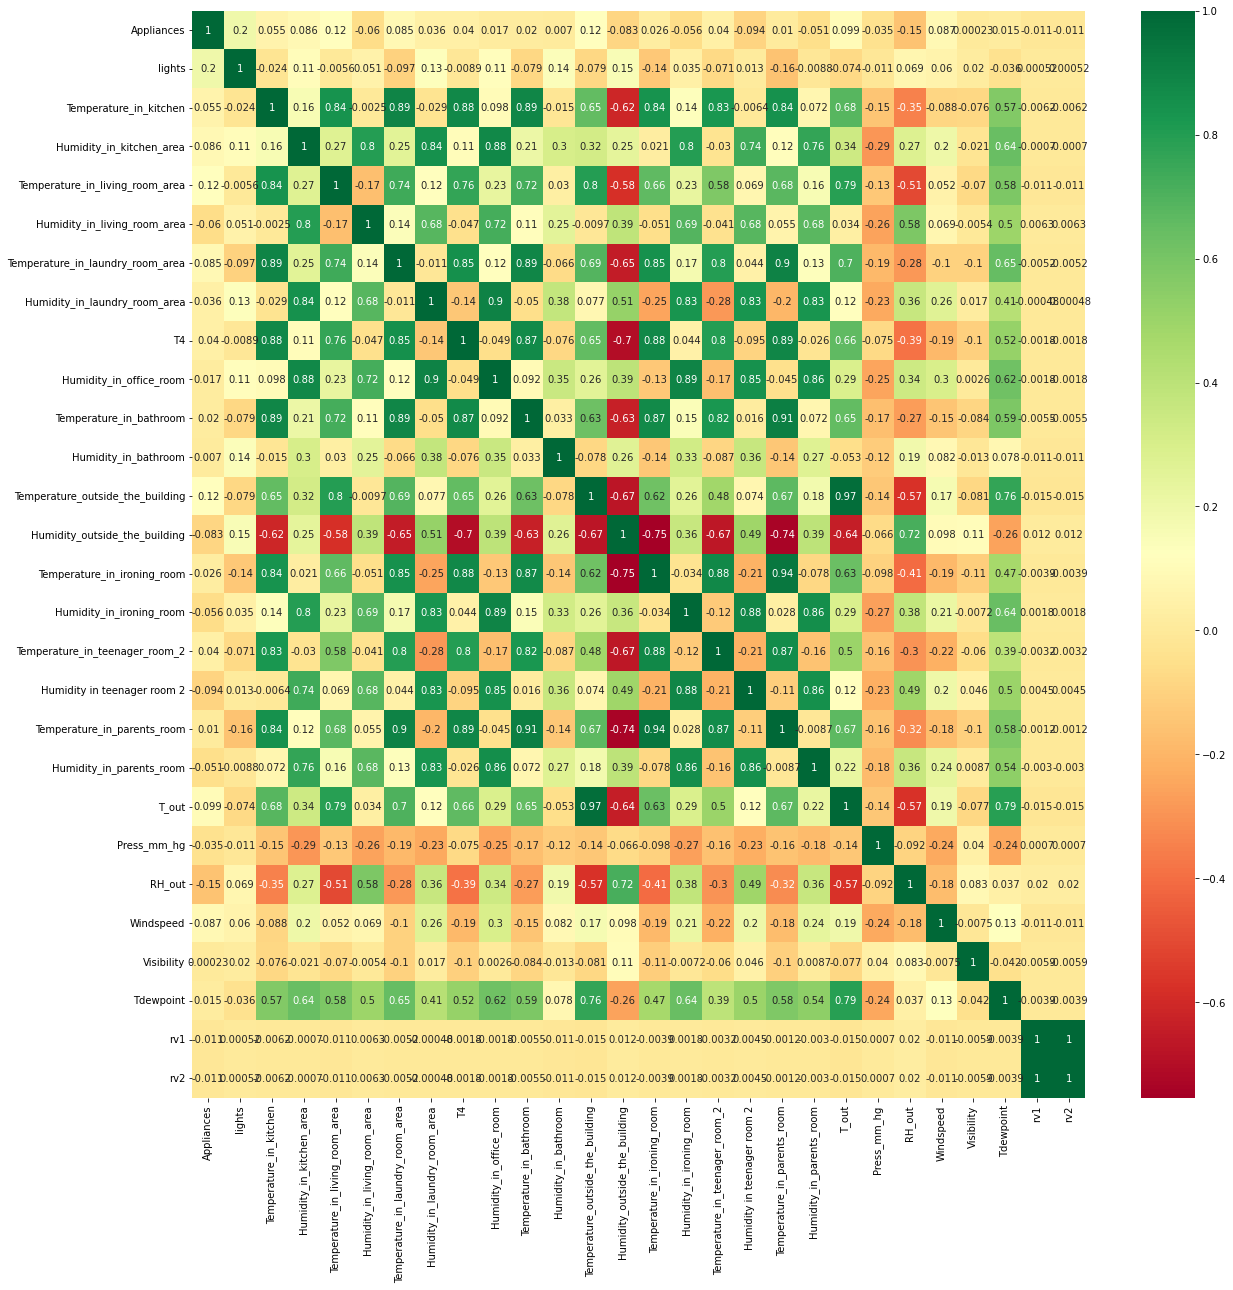

In [42]:
corrmap = data.corr()
top_corr_features = corrmap.index
plt.figure(figsize=(20,20))
#making heatmap
data_heatmap = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [44]:
#data sample selection from the dataset
sample_df = data[['Temperature_in_living_room_area', 'Temperature_outside_the_building']].sample(15,random_state=2)
sample_df

,Temperature_in_living_room_area,Temperature_outside_the_building
1117,17.426667,-4.238889
16275,22.760000,14.690000
13272,21.230000,8.926667
3160,21.100000,7.690000
19210,21.856667,10.800000
8260,17.356667,5.000000
12299,19.000000,5.300000
13505,22.700000,17.133333
12913,19.593333,7.545000
17788,21.890000,9.190000


In [45]:
sample_df.corr()

,Temperature_in_living_room_area,Temperature_outside_the_building
Temperature_in_living_room_area,1.000000,0.857532
Temperature_outside_the_building,0.857532,1.000000


<AxesSubplot:xlabel='Temperature_in_living_room_area', ylabel='Temperature_outside_the_building'>

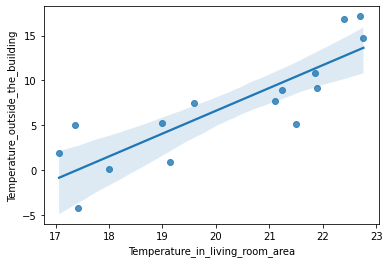

In [47]:
#regression plot
sns.regplot(x='Temperature_in_living_room_area',y='Temperature_outside_the_building',data=sample_df)

In [48]:
#parameters to fit the linear model
living_room_temp = pd.DataFrame(sample_df[['Temperature_in_living_room_area']])
outside_temp = pd.DataFrame(sample_df[['Temperature_outside_the_building']])

In [49]:
#linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(living_room_temp,outside_temp)

In [50]:
pred = model.predict(living_room_temp)

In [51]:
#calculating the rsquared value of the model
from sklearn.metrics import r2_score
r2 = r2_score(outside_temp,pred)
print(round(r2,2))

0.74


In [57]:
#creating a new dataframe 
new_df = data.drop(columns=['date','lights'],axis=1)
new_df

,Appliances,Temperature_in_kitchen,Humidity_in_kitchen_area,Temperature_in_living_room_area,Humidity_in_living_room_area,Temperature_in_laundry_room_area,Humidity_in_laundry_room_area,T4,Humidity_in_office_room,Temperature_in_bathroom,...,Temperature_in_parents_room,Humidity_in_parents_room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [58]:
#normalizing the new dataframe to a common scale using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normalized_df = pd.DataFrame(scaler.fit_transform(new_df),columns=new_df.columns)

feature_df = normalized_df.drop(columns=['Appliances']) 

target_variable = normalized_df.Appliances

In [59]:
from sklearn.linear_model import LinearRegression

#splitting our dataset into test and train dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_variable,  test_size=0.3,random_state=42)

In [60]:
y_train

9129     0.037383
2453     0.018692
9152     0.028037
12694    0.102804
16952    0.037383
           ...   
11284    0.046729
11964    0.102804
5390     0.018692
860      0.065421
15795    0.112150
Name: Appliances, Length: 13814, dtype: float64

In [61]:
x_train

,Temperature_in_kitchen,Humidity_in_kitchen_area,Temperature_in_living_room_area,Humidity_in_living_room_area,Temperature_in_laundry_room_area,Humidity_in_laundry_room_area,T4,Humidity_in_office_room,Temperature_in_bathroom,Humidity_in_bathroom,...,Temperature_in_parents_room,Humidity_in_parents_room,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
9129,0.497360,0.236767,0.122850,0.565939,0.373878,0.303474,0.476577,0.264760,0.408027,0.159533,...,0.475893,0.376380,0.168810,0.862791,0.776316,0.142857,0.984615,0.192308,0.724554,0.724554
2453,0.286167,0.482616,0.188999,0.669978,0.217957,0.735317,0.270270,0.691421,0.178691,0.333576,...,0.240375,0.703504,0.262594,0.836434,0.807018,0.142857,0.600000,0.342383,0.864041,0.864041
9152,0.422386,0.230529,0.057427,0.606430,0.373878,0.338059,0.414414,0.236449,0.378404,0.151639,...,0.468262,0.409803,0.110397,0.853488,0.859649,0.095238,0.917949,0.158371,0.499502,0.499502
12694,0.560718,0.446840,0.280834,0.704002,0.514290,0.515189,0.540541,0.486556,0.509317,0.424604,...,0.561915,0.340784,0.444802,0.559690,0.750000,0.119048,0.384615,0.558069,0.323173,0.323173
16952,0.835269,0.422071,1.000000,0.318493,0.745383,0.459106,0.900901,0.516432,0.748845,0.455819,...,0.854318,0.633278,0.849946,0.530233,0.355263,0.142857,0.600000,0.787330,0.341060,0.341060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.524815,0.381892,0.239157,0.636236,0.481888,0.478268,0.576577,0.517712,0.455805,0.250877,...,0.568852,0.471578,0.468382,0.492248,0.706140,0.476190,0.600000,0.562594,0.910318,0.910318
11964,0.591341,0.458949,0.428883,0.607461,0.456962,0.582489,0.557658,0.702518,0.417582,0.285310,...,0.561915,0.625966,0.717042,0.469767,0.552632,0.142857,0.600000,0.791855,0.698711,0.698711
5390,0.369588,0.238785,0.152653,0.481582,0.240944,0.412370,0.279279,0.325651,0.302914,0.161743,...,0.312175,0.426325,0.126474,0.595349,0.828947,0.261905,0.948718,0.165913,0.381388,0.381388
860,0.527983,0.234933,0.315047,0.412016,0.332336,0.380122,0.540541,0.341585,0.259914,0.245539,...,0.375650,0.509106,0.227224,0.831008,0.530702,0.095238,0.600000,0.114630,0.020909,0.020909


In [20]:
#fitiing new model
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

In [21]:
#testing our model
predicted_values = linear_model.predict(x_test)
predicted_values

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test,predicted_values)
print(round(mae,2))

0.05


In [23]:
rss = np.sum(np.square(y_test - predicted_values))
print(round(rss, 2))

45.35


In [24]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
print(round(rmse,3))

0.088


In [25]:
from sklearn.metrics import r2_score
r_square = r2_score(y_test,predicted_values)
print(round(r_square,2))

0.15


In [62]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [63]:
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [64]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [65]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [66]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [31]:
#checking for change in rmse
rmse2 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse2, 3)

0.088

In [32]:
final_weights.max()

Features                    rv2
Linear_Model_Weight    0.553547
Ridge_Weight           0.511932
Lasso_weight            0.01788
dtype: object

In [33]:
final_weights.min()

Features               Press_mm_hg
Linear_Model_Weight      -0.456698
Ridge_Weight             -0.401134
Lasso_weight             -0.049557
dtype: object

In [34]:
#training  lasso with a new alpha value
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [67]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,Humidity_in_living_room_area,-0.456698,-0.401134,-0.000000
1,T_out,-0.321860,-0.250765,0.000000
2,Temperature_in_living_room_area,-0.236178,-0.193880,0.000000
3,Temperature_in_parents_room,-0.189941,-0.188584,-0.000000
4,Humidity in teenager room 2,-0.157595,-0.156596,-0.000110
5,RH_out,-0.077671,-0.050541,-0.049557
6,Humidity_in_ironing_room,-0.044614,-0.046291,-0.000000
7,Humidity_in_parents_room,-0.039800,-0.041701,-0.000000
8,Temperature_in_bathroom,-0.015657,-0.020727,-0.000000
9,Temperature_in_kitchen,-0.003281,-0.021549,0.000000


In [68]:
#new rmse with lasso
rmse3 = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse3, 3)

0.088